## **Topic Modeling using BERT**


### 1. Load Data - Twitter US Airline Sentiment dataset - https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

In [ ]:
import pandas as pd
data = pd.read_csv('Tweets.csv')

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data["text_len"] = data["text"].apply(lambda x : len(x.split()))

In [ ]:
data_text = data[['text']]

In [ ]:
print("The longest headline has: {} words".format(data.text_len.max()))

The longest headline has: 36 words


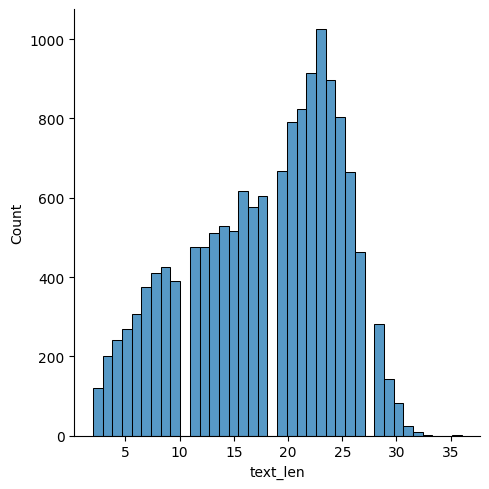

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.text_len, kde=False)

In [ ]:
for idx in data.sample(3).index:
    headline = data.iloc[idx]
    print("Headline #{}:".format(idx))
    print("Publication date: {}".format(headline.tweet_created))
    print("Text: {}\n".format(headline.text))

Headline #13312:
Publication date: 2015-02-23 08:08:32 -0800
Text: @AmericanAir Please try it yourself - call 1-800-433-7300 and see what happens... then you'll understand.  #allrepresentativesbusy #nooption

Headline #10792:
Publication date: 2015-02-20 12:41:54 -0800
Text: @USAirways hi there I am flying MYR-CLT-ORD tomorrow is weather looking ok or problematic?

Headline #9180:
Publication date: 2015-02-23 20:46:55 -0800
Text: @USAirways not yet. But we will see shortly.



### 2. Topic Modeling
In this example, we will go through the main components of BERTopic and the steps necessary to create a strong topic model.

#### (1) Training
We start by instantiating BERTopic. We set language to english since our documents are in the English language. If you would like to use a multi-lingual model, please use language="multilingual" instead.

We will also calculate the topic probabilities. However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). It is advised to turn this off if you want to speed up the model.

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.

BERTopic is a topic modeling technique that leverages BERT embeddings and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

The default embedding model is all-MiniLM-L6-v2 when selecting language="english" and paraphrase-multilingual-MiniLM-L12-v2 when selecting language="multilingual".

Documentation: https://maartengr.github.io/BERTopic/api/bertopic.html

In [ ]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
headline_topics, _ = model.fit_transform(data.text)

2025-02-19 08:42:08,107 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/458 [00:00<?, ?it/s]

2025-02-19 08:42:20,264 - BERTopic - Embedding - Completed ✓
2025-02-19 08:42:20,265 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-19 08:42:56,021 - BERTopic - Dimensionality - Completed ✓
2025-02-19 08:42:56,022 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-19 08:42:56,644 - BERTopic - Cluster - Completed ✓
2025-02-19 08:42:56,651 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-19 08:42:57,042 - BERTopic - Representation - Completed ✓


CPU times: user 1min 15s, sys: 7.43 s, total: 1min 23s
Wall time: 1min 32s


In [ ]:
from umap import UMAP

# UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique used in conjunction with BERTopic to visualize high-dimensional data in a lower-dimensional space.
# BERTopic employs UMAP to project the embeddings of documents into a 2D or 3D space, making it easier to interpret and explore the relationships between topics.

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
headline_topics, probabilities = model.fit_transform(data.text)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BERTopic model by default produces different results each time because of the stochasticity inherited from UMAP.

To get reproducible topics, we need to pass a value to the random_state parameter in the UMAP method.

n_neighbors=15 means that the local neighborhood size for UMAP is 15. This is the parameter that controls the local versus global structure in data.

A low value forces UMAP to focus more on local structure, and may lose insights into the big picture.

A high value pushes UMAP to look at the broader neighborhood, and may lose details on local structure.

The default n_neighbors values for UMAP is 15.

n_components=5 indicates that the target dimension from UMAP is 5. This is the dimension of data that will be passed into the clustering model.

min_dist controls how tightly UMAP is allowed to pack points together. It's the minimum distance between points in the low dimensional space.

Small values of min_dist result in clumpier embeddings, which is good for clustering. Since our goal of dimension reduction is to build clustering models, we set min_dist to 0.

Large values of min_dist prevent UMAP from packing points together and preserves the broad structure of data.

metric='cosine' indicates that we will use cosine to measure the distance.
random_state sets a random seed to make the UMAP results reproducible.

After initiating the UMAP model, we pass it to the BERTopic model, set the language to English, and set the calculate_probabilities parameter to True.

Finally, we pass the processed review documents to the topic model and saved the results for topics and topic probabilities.

The values in topics represents the topic each document is assigned to.
The values in probabilities represents the probability of a document belongs to each of the topics.

#### (2) Topic Extraction and Representation

In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 140


,Topic,Count,Name,Representation,Representative_Docs
0,-1,6092,-1_to_the_flight_united,"[to, the, flight, united, for, and, on, in, us...",[@southwestair y'all just Cancelled Flightled ...
1,0,1049,0_bag_bags_luggage_baggage,"[bag, bags, luggage, baggage, lost, my, checke...",[@united Really....you charge me $25 to check ...
2,1,560,1_jetblue_thanks_thank_you,"[jetblue, thanks, thank, you, love, good, soci...","[@JetBlue thanks, @JetBlue thanks!, @JetBlue t..."
3,2,332,2_southwestair_thank_southwest_thanks,"[southwestair, thank, southwest, thanks, you, ...","[@SouthwestAir thank you!!, @SouthwestAir Than..."
4,3,304,3_usairways_thank_thanks_you,"[usairways, thank, thanks, you, me, he, so, it...","[@USAirways thanks., @USAirways thanks. 😒, @US..."


The above table has 3 main columns, providing information about all the topics in descending order of topics size/Count.

'Topic' is the topic number, a kind of identifier, and the outliers are labeled as -1. Those are topics that should be ignored because they do not bring any added value.
'Count' is the number of words in the topic.
Name is the name given to the topic.
For each topic, we can retrieve the top words and their corresponding c-TF-IDF score. The higher the score, the most relevant the word is in representing the topic.

In [ ]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('bag', 0.03235317971659455),
 ('bags', 0.02515203643993762),
 ('luggage', 0.023350733052001305),
 ('baggage', 0.019514336722649045),
 ('lost', 0.013224585731501752),
 ('my', 0.011454192952974148),
 ('checked', 0.008397974838041932),
 ('claim', 0.008356725145086884),
 ('in', 0.007263968047832212),
 ('united', 0.007244203812186474)]

From this topic, we observe that all the words are coherent for the underlying topic which seems to be about firefighters 🔥.

#### (3) Topics Visualization (8 Visualizations)
The topic visualization helps in gaining more insight about each topic. BERTopic provides several visualization possibilities such as terms visualization, intertopic distance map, topic hierarchy clustering just to name a few, and our focus will be on those that have been cited.

#### A. Topic Terms
The most relevant words of each topic can be visualized in a form of barchart out of the c-TF-IDF score, which is interesting to visually compare topics. Below is the corresponding visualization for the topic 6 topics.

In [ ]:
model.visualize_barchart(top_n_topics=6)

#### B. Intertopic Distance Map
For those who are fimiliar with Latent Dirichlet Allocation LDAvis library.

This library provides the user with an interactive dashboard showing for each topic the corresponding words and their score.

BERTopic does the same with its visualize_topics() function and even go one step further by giving the distance between topics (the lower the most similar), and all of this with a single function visualize_topics()

In [ ]:
#embed c-TF-IDF representation of the topics in 2D using UMAP and then visualize the two dimensions
model.visualize_topics(top_n_topics=6)

#### C. Visualize Topic Hierarchy¶
As you can see in the Interdistance topic dashboard, some topics are very close.

One thing that could come to mind is how can I reduce the number of topics?

The good news is that those topics can be hierarchically in order to select the appropriate number of topics. The visualization flavor helps to understand how they relate to one another.

By looking at the first level (level 0) of the dendogram, we can see that topics with the same colors have been grouped together.

All these information can help the user better understand the reason why the topics have been considered to be similar one to another.


---
visualize_hierarchy(self, orientation='left', topics=None, top_n_topics=None, custom_labels=False, title='<b>Hierarchical Clustering</b>', width=1000, height=600, hierarchical_topics=None, linkage_function=None, distance_function=None, color_threshold=1)


In [ ]:
#show all hierarchy
#model.visualize_hierarchy()

#show top 6 topics
model.visualize_hierarchy(top_n_topics=6)

#### D. Visualize Heatmap (Topic Similarity Matrix)

A heatmap is a graphical representation of data where individual values in a matrix are represented as colors.

The basic idea is to represent the values in a matrix with colors, where each cell's color corresponds to its value. Typically, a color gradient is used to map low values to one color (e.g., shades of green) and high values to another color (e.g., shades of blue), creating a visual representation of the distribution and intensity of values in the matrix.



---
visualize_heatmap(self, topics=None, top_n_topics=None, n_clusters=None, custom_labels=False, title='<b>Similarity Matrix</b>', width=800, height=800)



In [ ]:
model.visualize_heatmap(top_n_topics=30)

#### E. Visualize Distribution of topic probabilities

---

visualize_distribution(self, probabilities, min_probability=0.015, custom_labels=False, title='<b>Topic Probability Distribution</b>', width=800, height=600)

In [ ]:
print('Row numbers: '+ str(len(probabilities))+' and Topic probabilities in each Row: ' +str(len(probabilities[0])))
# To interpret the output: there are 14,640 rows (documents) and 139 topic probabilities per row, suggesting a topic model with 139 topics.

Row numbers: 14640 and Topic probabilities in each Row: 139


In [ ]:
#show Distribution of topic probabilities in row 2
model.visualize_distribution(probabilities[1],0.0002) #min_probability=0.0002

In [ ]:
probabilities[1]

array([0.00097977, 0.00156841, 0.00136762, 0.00103356, 0.00076233,
       0.00113254, 0.0015437 , 0.00135061, 0.00085154, 0.00096252,
       0.00098809, 0.00163083, 0.00131821, 0.00146893, 0.00205345,
       0.00200574, 0.10935524, 0.00145   , 0.00108255, 0.00140882,
       0.00157859, 0.00127917, 0.00112655, 0.00104331, 0.00585033,
       0.00115282, 0.00075269, 0.00141295, 0.0003667 , 0.00143839,
       0.00173843, 0.00098664, 0.00114651, 0.00134866, 0.0011644 ,
       0.00177915, 0.001453  , 0.00142653, 0.00146501, 0.00088341,
       0.00159725, 0.00135469, 0.00075348, 0.00072946, 0.00175239,
       0.00090976, 0.00127834, 0.00193735, 0.00037006, 0.00169115,
       0.00111356, 0.00166634, 0.00099084, 0.00145837, 0.0012665 ,
       0.00180583, 0.00200348, 0.00130975, 0.00121608, 0.00128884,
       0.00144178, 0.00115026, 0.00172649, 0.0016249 , 0.00106213,
       0.00210749, 0.00144369, 0.00149576, 0.00172103, 0.00114562,
       0.00110469, 0.00140244, 0.00111858, 0.00161577, 0.00129

In [ ]:
#Therefore row 1 is classified to topic 15 (1=topic 0, 16=topic 15)
headline_topics[1]

16

#### F. Visualize the ranks of all terms across all topics

Topics are represented by a number of words starting with the best representative word. Each word is represented by a c-TF-IDF score. ***The higher the score, the more representative a word to the topic is***. Since the topic words are sorted by their c-TF-IDF score, the scores slowly decline with each word that is added. At some point adding words to the topic representation only marginally increases the total c-TF-IDF score and would not be beneficial for its representation.

To visualize this effect, we can plot the c-TF-IDF scores for each topic by the term rank of each word. In other words, ***the position of the words (term rank)***, where the words with the highest c-TF-IDF score will have a rank of 1, will be put on the x-axis. Whereas the y-axis will be populated by the c-TF-IDF scores. The result is a visualization that shows you the decline of c-TF-IDF score when adding words to the topic representation. It allows you, using the elbow method, the select the best number of words in a topic.



---
visualize_term_rank(self, topics=None, log_scale=False, custom_labels=False, title='<b>Term score decline per Topic</b>', width=800, height=500)


In [ ]:
model.visualize_term_rank(topics = [0, 1, 2, 3, 4, 5]) #if set topics, it will show red color

#### G. Visualize topics over time


---
topics_over_time(self, docs, timestamps, topics=None, nr_bins=None, datetime_format=None, evolution_tuning=True, global_tuning=True)


---
visualize_topics_over_time(self, topics_over_time, top_n_topics=None, topics=None, normalize_frequency=False, custom_labels=False, title='<b>Topics over Time</b>', width=1250, height=450)


In [ ]:
#Transfer to time format
#data['tweet_created_format']=data['tweet_created'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
data['tweet_created_format'] = pd.to_datetime(data['tweet_created'], errors='coerce')

#Create topics over time
topics_over_time = model.topics_over_time(data.text, timestamps=data.tweet_created_format, nr_bins=20)

In [ ]:
model.visualize_topics_over_time(topics_over_time, topics = [0, 1, 2, 3, 4, 5])

#### H. Visualize topics per class


---
topics_per_class(self, docs, classes, global_tuning=True)


---

visualize_topics_per_class(self, topics_per_class, top_n_topics=10, topics=None, normalize_frequency=False, custom_labels=False, title='<b>Topics per Class</b>', width=1250, height=900)


In [ ]:
docs=data['text']
classes=data['airline_sentiment']

#Create topics per class
topics_per_class = model.topics_per_class(docs, classes=classes)

model.visualize_topics_per_class(topics_per_class)

#### (4) Search Topics
Once the topic model is trained, we can search for topics that are semantically similar to an input query word/term using the find_topics function. In our case, we can search for top 3 topics that are related to the word 'politics'

In [ ]:
# Select most 3 similar topics
similar_topics, similarity = model.find_topics("politics", top_n = 3)

similar_topics contains the topics index from most similar to least similar.
similarity contains the similarity scores in descending order.

In [ ]:
similar_topics

[73, 70, 94]

In [ ]:
most_similar = similar_topics[0]
print("The Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

The Most Similar Topic Info: 
[('wall', 0.24961909427366713), ('ceo', 0.24480351506338432), ('jetblues', 0.23504601806975325), ('battles', 0.20668693174506575), ('appease', 0.20427346310847147), ('street', 0.18870914637377773), ('passengers', 0.14615357465913406), ('waterbury', 0.11886259167704623), ('republican', 0.11886259167704623), ('seeks', 0.09683763440489024)]
Similarity Score: 0.2181279957294464


### 3. Conclusion
Now, you know how to use BERTopic for topic modeling. The results are very encouraging, and do not hesitate to give it a try on your business case. However, it is important to note that the results of BERTopic are not consistent between runs, this is due to the stochastic nature of UMAP used for dimensionality reduction.

So, using the random_state parameter in UMAP the any stochastic behavior.

Reference kaggle post - https://www.kaggle.com/code/bansodesandeep/topic-modeling-with-bert/notebook



---



## **BERT for Sentiment Analysis**

We will do the following operations to train a sentiment analysis model:

- Install Transformers library;
- Load the BERT Classifier and Tokenizer alıng with Input modules;
- Download the IMDB Reviews Data and create a processed dataset (this will take several operations;
- Configure the Loaded BERT model and Train for Fine-tuning
- Make Predictions with the Fine-tuned Model


### 1. Intalling the Transformers library from Huggingface
Huggingface's Transformers Library provides thousands of pretrained models to perform tasks on texts such as classification, information extraction, question answering, summarization, translation, text generation, etc in 100+ languages. Its aim is to make cutting-edge NLP easier to use for everyone.

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install transformers

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

#num_labels should set to 3 because it is a multi-class classification
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels = 3)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109484547 (417.65 MB)
Trainable params: 109484547 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2. Load Data - Twitter US Airline Sentiment dataset and Preprocess

In [ ]:
df = pd.read_csv('Tweets.csv')

print('No. of rows and columns :', df.shape)
df.head()

No. of rows and columns : (14640, 17)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_len,tweet_created_format
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),4,2015-02-24 11:35:52-08:00
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),9,2015-02-24 11:15:59-08:00
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),12,2015-02-24 11:15:48-08:00
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),17,2015-02-24 11:15:36-08:00
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),10,2015-02-24 11:14:45-08:00


In [ ]:
!python -m spacy download en_core_web_lg

2023-12-20 05:39:11.189163: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 05:39:11.189203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 05:39:11.190806: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 05:39:13.106085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import re
#loads the pre-trained spaCy model for English language processing,
nlp = spacy.load("en_core_web_lg")

# function to return a string that represents the lemmatized version of the input
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)

In [ ]:
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# to remove URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# to remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [ ]:
df['text'] = df['text'].apply(remove_URL)
df['text'] = df['text'].apply(remove_html)
df['text'] = df['text'].apply(alpha_num)
#df['review'] = df['review'].apply(alpha_num)
#df['review'] = df['review'].apply(normalize, lowercase=True, remove_stopwords=True)

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_len,tweet_created_format
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,VirginAmerica What dhepburn said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),4,2015-02-24 11:35:52-08:00
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,VirginAmerica plus youve added commercials to ...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),9,2015-02-24 11:15:59-08:00
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,VirginAmerica I didnt today Must mean I need t...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),12,2015-02-24 11:15:48-08:00
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,VirginAmerica its really aggressive to blast o...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),17,2015-02-24 11:15:36-08:00
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,VirginAmerica and its a really big bad thing a...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),10,2015-02-24 11:14:45-08:00


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['airline_sentiment'])
df['labels'] = label_encoder.transform(df['airline_sentiment'])

In [ ]:
#Inspect the labels generated by a label encoder alongside their corresponding true classes
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)

{'negative': 0, 'neutral': 1, 'positive': 2}


In [ ]:
from sklearn.model_selection import train_test_split
# train-test split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df['text'], df['labels'], test_size=0.2, random_state=5, stratify=df['labels'])

In [ ]:
train =pd.DataFrame([train_sentences, train_labels]).T
train.head()

,text,labels
11535,usairways usairways unacceptable holdtime REALLY,0
650,united so youre telling me there is no number ...,0
11428,USAirways Have him call me I cant wait to see...,0
12402,AmericanAir have you seen Blue Go look it up,2
9979,USAirways on the phone over an hour waiting fo...,0


In [ ]:
test = pd.DataFrame([test_sentences, test_labels]).T
test.head()

,text,labels
14064,AmericanAir it wasnt really about the delay It...,0
10221,USAirways job well done from your Philly emplo...,2
12091,AmericanAir thanks,2
1943,united they let us board again but will we fly...,0
1470,united it was delivered Thank you for making s...,2


### 3. Create the Input Sequences

We have two pandas Dataframe objects waiting for us to convert them into suitable objects for the BERT model. We will take advantage of the InputExample function that helps us to create sequences from our dataset.

https://huggingface.co/docs/transformers/v4.28.1/en/main_classes/processors#transformers.InputExample

Now we will create two main functions:

— convert_data_to_examples: This will accept our train and test datasets and convert each row into an InputExample object.

— convert_examples_to_tf_dataset: This function will tokenize the InputExample objects, then create the required input format with the tokenized objects, finally, create an input dataset that we can feed to the model.

In [ ]:
import tensorflow as tf
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN):
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN],
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN],
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train,
                                                                           test,
                                                                           'DATA_COLUMN',
                                                                           'LABEL_COLUMN')

def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )

DATA_COLUMN = 'text'
LABEL_COLUMN = 'labels'

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

### 4. Configuring the BERT model and Fine-tuning
We will use Adam as our optimizer, CategoricalCrossentropy as our loss function, and SparseCategoricalAccuracy as our accuracy metric. Fine-tuning the model for 2 epochs will give us around 95% accuracy.



In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=2, validation_data=validation_data)

Epoch 1/2
732/732 [==============================] - 677s 840ms/step - loss: 0.4035 - accuracy: 0.8464 - val_loss: 0.4837 - val_accuracy: 0.8340
Epoch 2/2
732/732 [==============================] - 609s 832ms/step - loss: 0.1388 - accuracy: 0.9533 - val_loss: 0.7158 - val_accuracy: 0.8303


### 5. Making Predictions
I created a list of two reviews I created. The first one is a positive review, while the second one is clearly negative.

In [ ]:
pred_sentences = ['I am not happy to this journey',
                  'I could not believe the flight was delayed',
                  'the flight was so great!',
                  'I will observe the flight quality next time']

We need to tokenize our reviews with our pre-trained BERT tokenizer. We will then feed these tokenized sequences to our model and run a final softmax layer to get the predictions. We can then use the argmax function to determine whether our sentiment prediction for the review is positive or negative. Finally, we will print out the results with a simple for loop. The following lines do all of these said operations:

In [ ]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Negative','Neutral','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

I am not happy to this journey : 
 Negative
I could not believe the flight was delayed : 
 Negative
the flight was so great! : 
 Positive
I will observe the flight quality next time : 
 Neutral
